In [2]:
# Install necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib
import seaborn as sns
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
import os

/Users/kylemiller/git/pynance/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%***********************]  5 of 5 completed


<Axes: title={'center': 'Cumulative Log Returns of Selected Stocks Over Last 5 Years'}, xlabel='Date'>

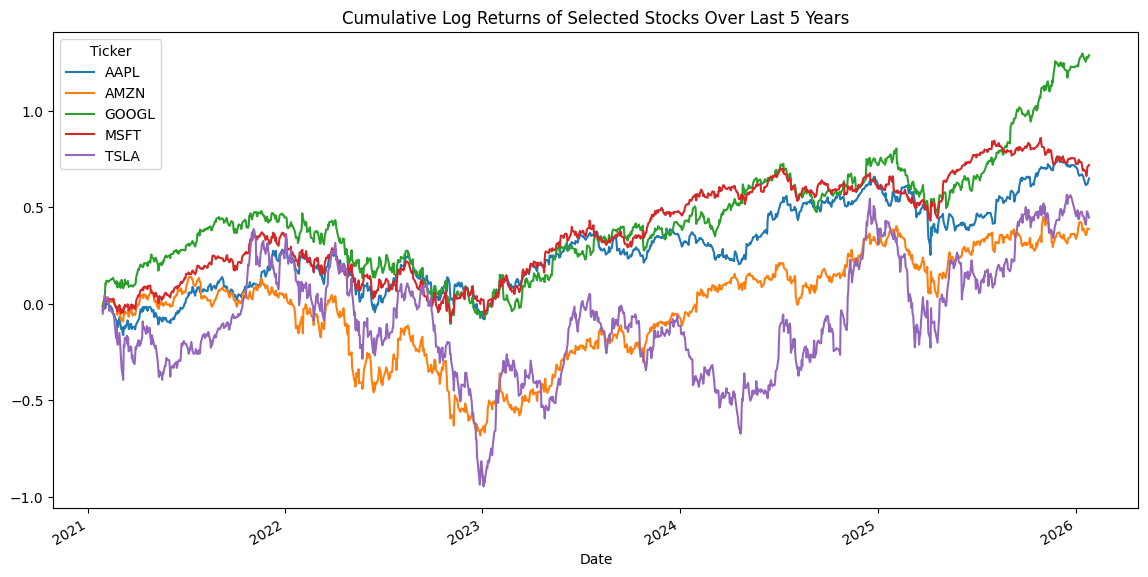

In [7]:
# Quick tutorial on using yfinance to get stock data and analyze it
# https://www.youtube.com/watch?v=uOqPElBsBmM
# Run some stuff with yfinance
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*5)  # Last 5

# Stocks we care about
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download stock data
df = yf.download(stocks, start=startDate, end=endDate)

# Look at closing prices only
df.head()
close_prices = df['Close']

# Calculate daily returns
daily_returns = np.log(close_prices / close_prices.shift(1))

# Calculate cumulative returns
cumulative_returns = daily_returns.cumsum()

# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 7), title='Cumulative Log Returns of Selected Stocks Over Last 5 Years')

In [ ]:
# Free stock Prices in Python
# Define the tickers list
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Set the start and end dates
endDate = dt.datetime.today()
print(endDate)

startDate = endDate - dt.timedelta(days=365*2)  # Last 2 years
print(startDate)

# Create empty data frame 
closeDf = pd.DataFrame()

# Loop over each stock
for i in tickers:
    # Fetch the data
    tempDf = yf.download(i, start=startDate, end=endDate)
    
    # Store the 'Close' price in the closeDf DataFrame
    closeDf[i] = tempDf['Close']

# Display the closing prices DataFrame
closeDf.head()

# Set output path
opf = r"./stock_data.csv"

# Save to CSV
closeDf.to_csv(opf)

2026-01-26 19:38:59.635358
2024-01-27 19:38:59.635358


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Metrics that actually matter to a stock trader (according to ChatGPT)
# AAPL Stock Analysis Example
ticker = 'AAPL'
multipleTickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

appleStock = yf.Ticker(ticker)  
multipleStocks = yf.Tickers(multipleTickers)

# Get information about the stock
appleInfo = appleStock.info

# Get financials
appleFinancials = appleStock.financials

# Get balance sheet
appleBalanceSheet = appleStock.balance_sheet

# Get current stock price
applePrice = appleInfo.get('currentPrice')

# Get current shares outstanding
appleSharesOutstanding = appleInfo.get('sharesOutstanding')

# Get trailing earnings per share (EPS)
appleEPS = appleInfo.get('trailingEps')

# Get earnings growth rate
appleEarningsGrowth = appleInfo.get('earningsGrowth')

# Get book value per share
appleBookValue = appleInfo.get('bookValue')

# Get EBIT
#appleEBIT = appleFinancials.get("EBIT",0) if "EBIT" in appleFinancials.index else None
appleEBIT = appleFinancials.loc["EBIT"].iloc[0]

# Get total debt
appleTotalDebt = appleBalanceSheet.get("totalDebt",0)

# Get total cash
appleTotalCash = appleBalanceSheet.get("totalCash",0)

# Valuation Ratios
# Price to Earnings (P/E) Ratio
pe = applePrice / appleEPS if appleEPS else None
print(f"Price to Earnings (P/E) Ratio: {pe}")

# Price/Earnings to Growth (PEG) Ratio
peg = pe / (appleEarningsGrowth * 100) if appleEarningsGrowth else None
print(f"Price/Earnings to Growth (PEG) Ratio: {peg}")

# Price to Book (P/B) Ratio
pb = applePrice / appleBookValue if appleBookValue else None
print(f"Price to Book (P/B) Ratio: {pb}")


# Enterprise Value to EBIT (EV/EBIT) Ratio
# Enterprise Value = Market Cap + Total Debt - Cash
enterpriseValue = (applePrice * appleSharesOutstanding) + appleTotalDebt - appleTotalCash if applePrice and appleSharesOutstanding else None
evEbitRatio = enterpriseValue / appleEBIT if appleEBIT else None
print(f"Enterprise Value to EBIT (EV/EBIT) Ratio: {evEbitRatio}")

data = {
    "Ticker": ticker,
    "Current Price": applePrice,
    "P/E Ratio": pe,
    "PEG Ratio": peg,
    "P/B Ratio": pb,
    "EV/EBIT Ratio": evEbitRatio
}

dummyData = pd.DataFrame([data])

# Style it as an HTML table
html_table = dummyData.round(2).to_html(index=False,
                                        classes = "valuation-table")


Price to Earnings (P/E) Ratio: 32.88719898605831
Price/Earnings to Growth (PEG) Ratio: 1.7971146986917108
Price to Book (P/B) Ratio: 43.26108702900967
Enterprise Value to EBIT (EV/EBIT) Ratio: 28.63180914844044
